In [0]:
!pip3 install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 24.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
!pip3 install eli5

    100% |████████████████████████████████| 102kB 2.7MB/s 


In [0]:
# Libraries

import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('ggploZt')
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
import eli5
# import shap
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
pip install catboost --no-cache-dir

    100% |████████████████████████████████| 60.6MB 65.0MB/s 


In [0]:
from catboost import CatBoostRegressor

In [0]:
# from google.colab import files
# uploaded = files.upload() #this method is too slow

# Download data from kaggle api

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!mkdir -p data
!kaggle competitions download -c tmdb-box-office-prediction

  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 23.5MB/s]
 71% 5.00M/7.02M [00:00<00:00, 28.4MB/s]
100% 7.02M/7.02M [00:00<00:00, 34.1MB/s]
 48% 5.00M/10.3M [00:00<00:00, 43.2MB/s]
100% 10.3M/10.3M [00:00<00:00, 66.0MB/s]


In [0]:
# import io
# uploaded_train = files.upload()
# train = pd.read_csv(io.BytesIO(uploaded_train['train.csv']))
# uploaded = files.upload()
# test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Reading data

In [0]:
! unzip train.csv.zip 
! unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [0]:
train.shape , test.shape

((3000, 23), (4398, 22))

We have less training data compared to the test set. 

# Data Analysis (EDA)

**Data description **

Data Description id - Integer unique id of each movie

belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

budget:Budget of a movie in dollars. 0 values mean unknown.

genres : Contains all the Genres Name & TMDB Id in JSON Format

homepage - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/ , this is the homepage of Whiplash movie.

imdb_id - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/

original_language - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.

original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

overview - Brief description of the movie.

popularity - Popularity of the movie in float.

poster_path - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/

production_companies - All production company name and TMDB id in JSON format of a movie.

production_countries - Two digit code and full name of the production company in JSON format.

release_date - Release date of a movie in mm/dd/yy format.

runtime - Total runtime of a movie in minutes (Integer).

spoken_languages - Two digit code and full name of the spoken language.

status - Is the movie released or rumored?

tagline - Tagline of a movie

title - English title of a movie

Keywords - TMDB Id and name of all the keywords in JSON format.

cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

revenue - Total revenue earned by a movie in dollars.

There are several columns with list of dictionaries. Let's see how can extract info from them

In [0]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

belongs_to_collection and homepage are > ~60 % empty. Let's check if we can extract any useful info from these columns

In [0]:
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 nan
3 nan
4 nan


In [0]:
idx = (train['belongs_to_collection'].isnull())
print(idx)

0       False
1       False
2        True
3        True
4        True
5        True
6        True
7        True
8       False
9        True
10      False
11      False
12       True
13      False
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21      False
22      False
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2970     True
2971     True
2972     True
2973     True
2974    False
2975     True
2976     True
2977     True
2978     True
2979     True
2980     True
2981     True
2982     True
2983     True
2984    False
2985     True
2986     True
2987     True
2988     True
2989     True
2990     True
2991    False
2992     True
2993     True
2994     True
2995     True
2996     True
2997     True
2998     True
2999     True
Name: belongs_to_collection, Length: 3000, dtype: bool


In [0]:
collection_name = []
has_collection = []

In [0]:
for i in range(0,len(train['belongs_to_collection'])):
    #print(idx[i])
    #print(idx[i]'False')
    if not idx[i]:
      #print(train['belongs_to_collection'][i])
      d = ast.literal_eval(train['belongs_to_collection'][i])
      collection_name.append(d[0]['name'])
      has_collection.append(1)
    else:
      collection_name.append('')
      has_collection.append(0)

In [0]:
train['collection_name'] = collection_name
train['has_collection'] = has_collection

In [0]:
idx1 = (test['belongs_to_collection'].isnull())
test_collection_name = []
test_has_collection = []

In [0]:
for i in range(0,len(test['belongs_to_collection'])):
    if not idx1[i]:
      d = ast.literal_eval(test['belongs_to_collection'][i])
      test_collection_name.append(d[0]['name'])
      test_has_collection.append(1)
    else:
      test_collection_name.append('')
      test_has_collection.append(0)

In [0]:
test['collection_name'] = test_collection_name
test['has_collection'] = test_has_collection

In [0]:
train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

***Handling genres***.
We have unique id for each genre and each movie and belong to multiple genres. 

In [0]:
for i, e in enumerate(train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [0]:
dict_columns = ['genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

In [0]:
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

Most films in general has 1- 3 genres. Some films have <1 and > 6 which can be considered as outliers.

In [0]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [0]:
stop = set(stopwords.words('english'))

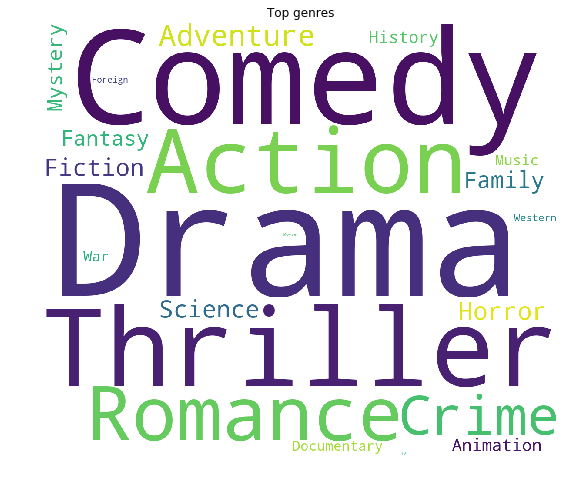

In [0]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

Thriller, Comedy, Drama , Action are most common.
Let's check their individual frequency. 

In [0]:
print(list_of_genres)

[['Comedy'], ['Comedy', 'Drama', 'Family', 'Romance'], ['Drama'], ['Thriller', 'Drama'], ['Action', 'Thriller'], ['Animation', 'Adventure', 'Family'], ['Horror', 'Thriller'], ['Documentary'], ['Action', 'Comedy', 'Music', 'Family', 'Adventure'], ['Comedy', 'Music'], ['Drama'], ['Comedy'], ['Drama'], ['Comedy', 'Crime'], ['Action', 'Thriller', 'Science Fiction', 'Mystery'], ['Action', 'Crime', 'Drama'], ['Horror', 'Thriller'], ['Drama', 'Romance'], ['Comedy', 'Romance'], ['Action', 'Thriller', 'Crime'], ['Adventure', 'Family', 'Science Fiction'], ['Horror', 'Thriller'], ['Thriller', 'Horror'], ['Thriller', 'Mystery', 'Foreign'], ['Horror', 'Comedy'], ['Comedy', 'Horror', 'Mystery', 'Thriller'], ['Crime', 'Drama', 'Mystery', 'Thriller'], ['Drama', 'Comedy', 'Romance'], ['Animation'], ['Action', 'Adventure', 'Crime', 'Thriller'], ['Drama', 'Comedy'], ['Mystery', 'Drama', 'Thriller'], ['Fantasy', 'Action', 'Adventure'], ['Horror'], ['Action', 'Comedy', 'Crime', 'Thriller'], ['Action', 'Cri

In [0]:
Counter([j for i in list_of_genres for j in i ]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [0]:
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)

In [0]:
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

In [0]:
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

In [0]:
top_genres = [m[0] for m in Counter([j for i in list_of_genres for j in i ]).most_common()]

In [0]:
#add column for each genre
for g in top_genres:
  train['genre_'+g] = train['all_genres'].apply(lambda x : 1 if g in x else 0)

In [0]:
test_list_of_genres = list(test['genres'].apply(lambda x : [i['name'] for i in x] if x!= {} else []))

In [0]:
Counter([j for i in test_list_of_genres for j in i])

Counter({'Action': 994,
         'Adventure': 677,
         'Animation': 241,
         'Comedy': 1577,
         'Crime': 615,
         'Documentary': 134,
         'Drama': 2145,
         'Family': 415,
         'Fantasy': 396,
         'Foreign': 53,
         'History': 163,
         'Horror': 434,
         'Music': 167,
         'Mystery': 325,
         'Romance': 864,
         'Science Fiction': 454,
         'Thriller': 1080,
         'War': 143,
         'Western': 74})

In [0]:
test_top_genres = [m[0] for m in Counter([j for i in list_of_genres for j in i ]).most_common()]

In [0]:
for g in test_top_genres:
  test['genre_'+g] = test['all_genres'].apply(lambda x : 1 if g in x else 0)

In [0]:
train = train.drop(['genres'],axis=1)
test = test.drop(['genres'],axis=1)

Next in the data we have production companies column which is a list of dictionary

In [0]:
for i,e in enumerate(train['production_companies'][:5]):
  print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


Get counts of most common production company

In [0]:
list_production_companies = [i['name'] for j in train['production_companies'] for i in j]

In [0]:
Counter(list_production_companies).most_common()

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23),
 ('Castle Rock Entertainment', 21),
 ('Epsilon Motion Pictures', 21),
 ('Morgan Creek Productions', 21),
 ('Original Film', 21),
 ('Focus 

lets check what is the aveage numbrer of production companies per movie. 

In [0]:
num_prod_houses = [len(x) for x in train['production_companies']]
Counter(num_prod_houses)

Counter({0: 156,
         1: 775,
         2: 734,
         3: 582,
         4: 312,
         5: 166,
         6: 118,
         7: 62,
         8: 42,
         9: 29,
         10: 7,
         11: 7,
         12: 3,
         13: 1,
         14: 1,
         15: 2,
         16: 2,
         17: 1})

MOst of the movies have 1-4 production houses. In rare cases they exceed. Let's see if we have a correlation between number of production houses vs revenue. 

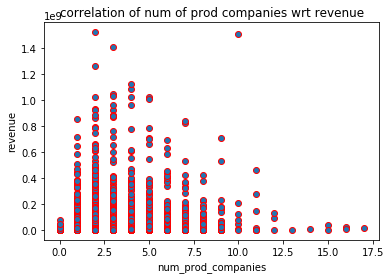

In [0]:
num_prod_companies = [len(x) for x in train['production_companies']]
revenue = train['revenue']
plt.scatter(num_prod_companies, revenue, edgecolors='r')
plt.xlabel('num_prod_companies')
plt.ylabel('revenue')
plt.title('correlation of num of prod companies wrt revenue')
plt.show()

In [0]:
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_production_companies for i in j]).most_common(30)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

Production countries

In [0]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(25)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

In [0]:
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_countries', 'all_countries'], axis=1)
test = test.drop(['production_countries', 'all_countries'], axis=1)

In [0]:
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_languages for i in j]).most_common(15)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [0]:
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['spoken_languages', 'all_languages'], axis=1)
test = test.drop(['spoken_languages', 'all_languages'], axis=1)

Keywords¶


number of  keywords per movie 

In [0]:
train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: Keywords, dtype: int64

most occuring key words

In [0]:
keyword_list = [x['name'] for j in train['Keywords'] for x in j]

In [0]:
Counter(keyword_list).most_common()

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female nudity', 53),
 ('drug', 52),
 ('prison', 50),
 ('musical', 49),
 ('high school', 49),
 ('los angeles', 48),
 ('new york', 47),
 ('family', 45),
 ('father son relationship', 44),
 ('kidnapping', 41),
 ('investigation', 41),
 ('wedding', 40),
 ('3d', 40),
 ('detective', 38),
 ('london england', 38),
 ('paris', 37),
 ('based on comic', 37),
 ('robbery', 36),
 ('based on true story', 35),
 ('dying and death', 34),
 ('escape', 34),
 ('alien', 34),
 ('brother brother relationship', 34),
 ('prostitute', 34),
 ('suicide', 33),
 ('rape', 33),
 ('corruption', 33),
 ('death', 32),
 ('superhero', 32),
 (

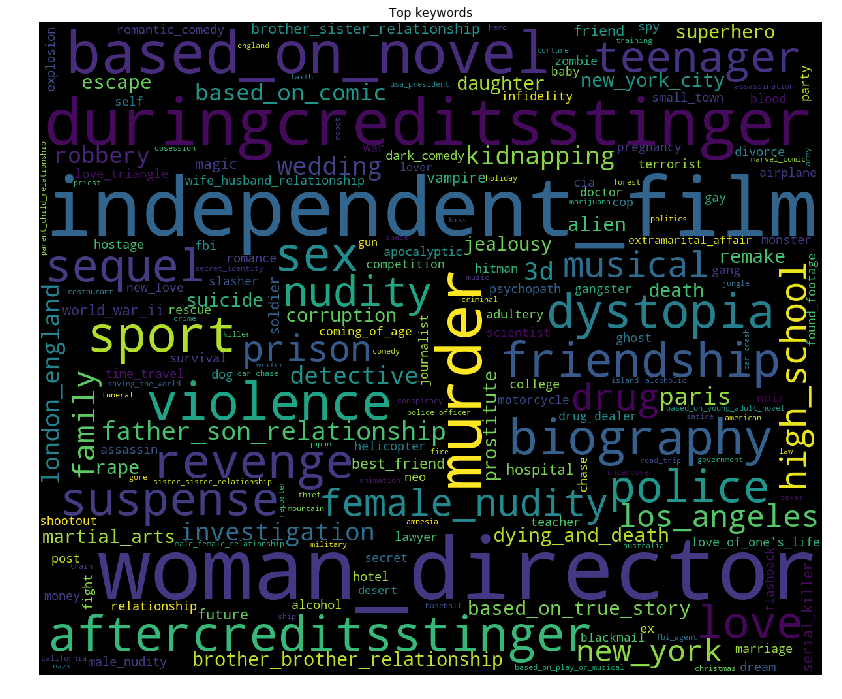

In [0]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (16, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.show()

Check if we can get any correlation of key words with revenue

In [0]:
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['Keywords', 'all_Keywords'], axis=1)
test = test.drop(['Keywords', 'all_Keywords'], axis=1)

Next we have cast data column which is dictionaru containing cast name, role played, gender. Let's extract useful information from this. 

In [0]:
#no.of cast per movie. 
num_cast = train['cast'].apply(lambda x: len(x) if x != {} else 0)
train['num_cast'] = num_cast

Let's see who are the most famous cast members. If a member is occurring in many films that means he/she is fetching good revenues to movies and is a good actor. 

In [0]:
list_of_cast_names = [x['name'] for j in train['cast'] for x in j]
top_cast_names = Counter(list_of_cast_names).most_common(50)
#len(Counter(list_of_cast_names))

In [0]:
top_cast_names[0][0]

'Samuel L. Jackson'

In [0]:
for g in top_cast_names:
    #print(g[0])
    train['cast_name_' + g[0]] = train['cast'].apply(lambda x: 1 if g[0] in str(x) else 0)

lets do the same for test

In [0]:
num_cast = test['cast'].apply(lambda x: len(x) if x != {} else 0)
test['num_cast'] = num_cast

In [0]:
for g in top_cast_names:
    #print(g[0])
    test['cast_name_' + g[0]] = test['cast'].apply(lambda x: 1 if g[0] in str(x) else 0)

In [0]:
train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

Processing crew. good budget movie has many crew membrs and also famous people as crew members. 

In [0]:
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)

In [0]:
list_of_crew_mems = [x['name'] for j in train['crew'] for x in j]
top_crew_mems = Counter(list_of_crew_mems).most_common(50)

In [0]:
for j in top_crew_mems:
  train['crew_name_' + j[0]] = train['crew'].apply(lambda x: 1 if j[0] in str(x) else 0)

In [0]:
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
for j in top_crew_mems:
  test['crew_name_' + j[0]] = test['crew'].apply(lambda x: 1 if j[0] in str(x) else 0)

We are pretty much done with the data cleaning part. Lets go ahead and do some analysis on the data and hopefully extract some correlation between the given data and revenue achieved. 

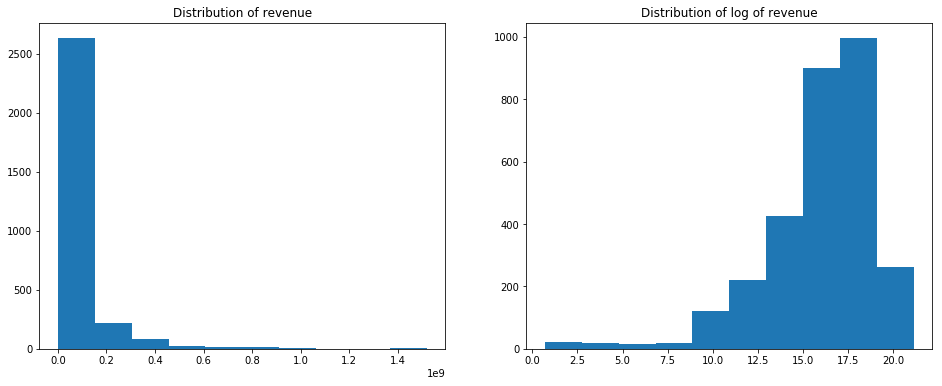

In [0]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

In [0]:
train['log_revenue'] = np.log1p(train['revenue'])

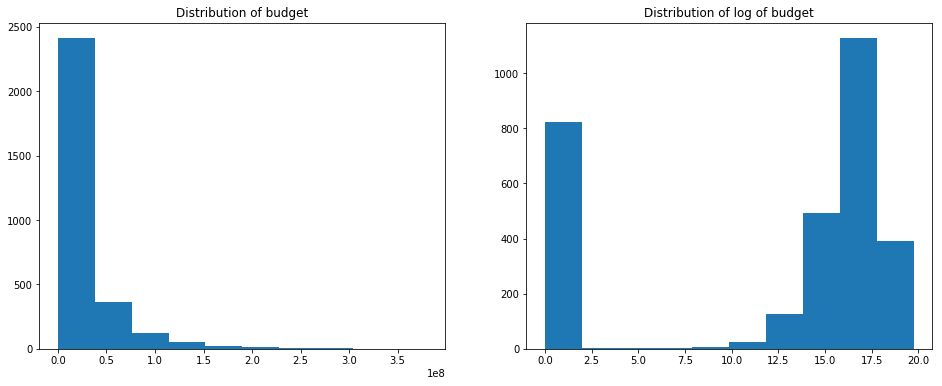

In [0]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

log transformation makes budget distribution more manageable

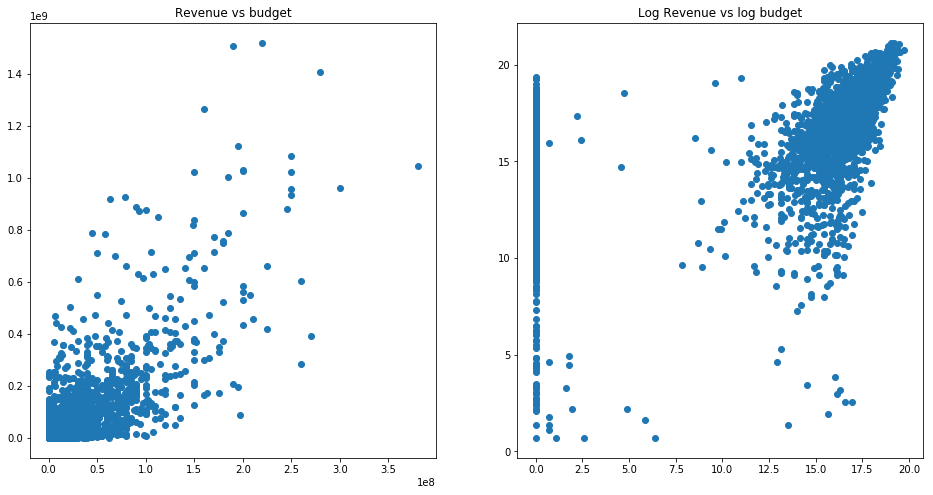

In [0]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.title('Log Revenue vs log budget');

In [0]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

In [0]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

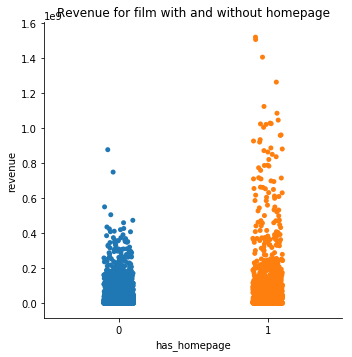

In [0]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

We have overview for each move. Let's see if we can extract any important information of movie is received by people based on the type of overview. 
Generating word which are most common in overview. 

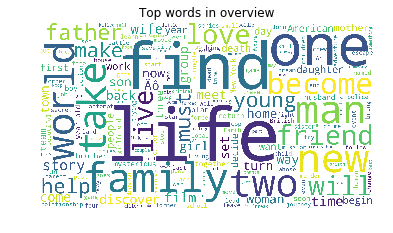

In [0]:
overview_text = ' '.join(train['overview'].fillna(' ').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1800, height=1000).generate(overview_text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

In [0]:
vectorizer = TfidfVectorizer(sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text_vector = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text_vector, train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

popularity - assuming it refers to some kind of average rating the movie received. 
Let's check the relation between popularity vs revenue

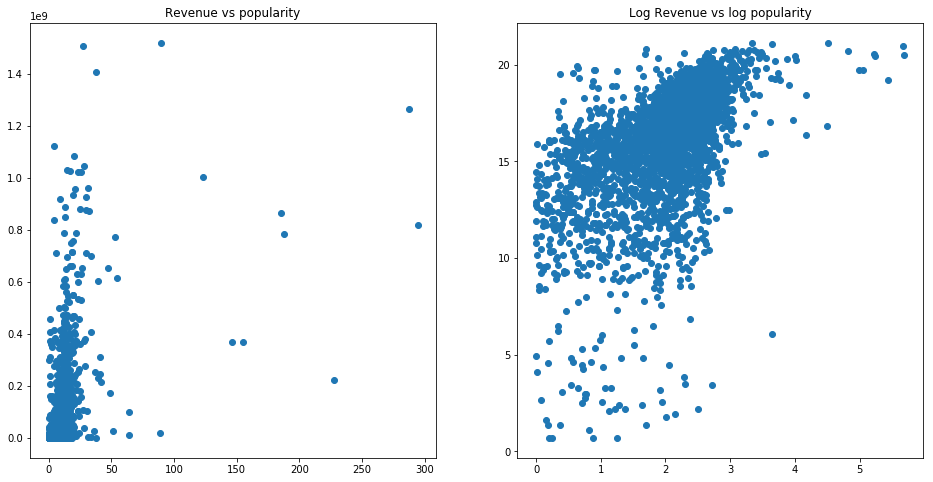

In [0]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['popularity'], train['revenue'])
plt.title('Revenue vs popularity');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['popularity']), train['log_revenue'])
plt.title('Log Revenue vs log popularity');

revenue and popularity seem to have string relationship. Checking the distribution of popularity

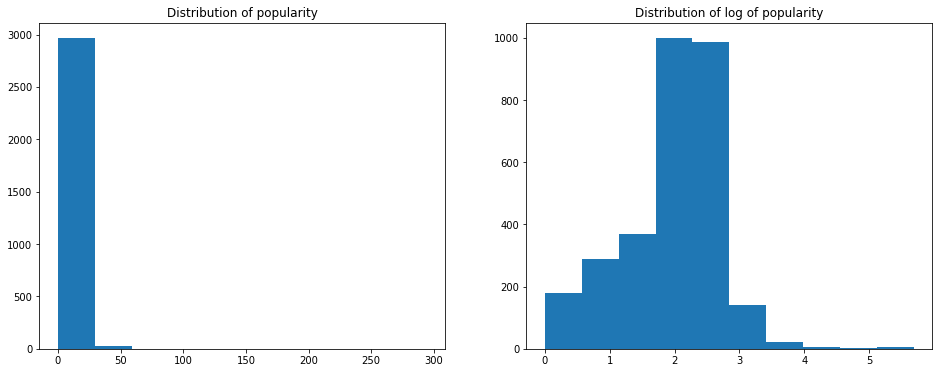

In [0]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['popularity']);
plt.title('Distribution of popularity');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['popularity']));
plt.title('Distribution of log of popularity');

log of popularity is much well distributed. 
adding it to the data

In [0]:
train['log_popularity'] = np.log1p(train['popularity'])
test['log_popularity'] = np.log1p(test['popularity'])

processing release date

In [0]:
train['release_date'].isnull().sum()

0

In [0]:
test['release_date'].isnull().sum()

1

we don't have any null values for release dates in training set. We have 1 in test set. 

In [0]:
test.loc[test['release_date'].isnull() == True,'release_date'] = '01/01/1998'

In [0]:
#check if any dates are in format of mm/dd/yy we want them to be in format mm/dd/yyyy. 

def check_format(date):
  year = date.split('/')[2]
  
  if len(year) == 2:
    print(date)

In [0]:
train['release_date'].map(check_format)

2/20/15
8/6/04
10/10/14
3/9/12
2/5/09
8/6/87
8/30/12
1/15/04
2/16/96
4/16/03
11/21/76
7/10/87
9/15/99
3/4/05
6/20/02
10/6/10
8/4/05
12/25/13
2/2/11
8/2/05
4/3/98
8/13/82
7/28/12
9/2/11
9/9/06
10/23/92
9/8/97
9/7/13
8/8/86
4/7/02
11/2/11
5/2/05
10/21/15
10/2/14
8/8/07
4/16/12
1/28/00
3/10/95
9/13/13
4/7/65
4/26/06
6/22/67
3/3/00
9/5/14
2/4/05
10/9/09
3/23/06
12/25/15
3/24/17
11/17/94
1/30/08
7/1/65
6/24/80
1/15/88
2/19/16
7/2/93
8/5/09
6/20/97
6/24/08
3/8/02
11/14/06
5/30/56
1/16/98
7/28/89
9/21/13
2/26/88
1/14/10
10/4/13
12/25/62
6/3/06
3/4/05
2/6/04
4/5/90
3/30/04
3/31/76
8/18/11
5/5/00
7/25/80
12/18/81
9/15/16
12/14/02
10/21/05
7/29/05
12/6/84
1/21/11
6/9/95
12/18/79
1/30/95
3/31/17
2/5/93
10/10/03
3/16/01
9/20/95
5/15/08
5/16/01
12/9/12
11/14/11
6/26/11
8/31/12
4/15/88
1/26/90
12/11/01
8/18/07
9/28/12
2/20/14
9/8/13
1/21/10
5/24/95
4/15/99
10/10/66
10/12/01
8/6/04
11/20/15
3/25/88
12/18/01
5/31/02
11/1/12
3/2/07
6/18/93
1/31/97
8/3/01
6/18/99
2/9/90
3/20/00
7/17/09
7/3/08
6/2/78
12/

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2970    None
2971    None
2972    None
2973    None
2974    None
2975    None
2976    None
2977    None
2978    None
2979    None
2980    None
2981    None
2982    None
2983    None
2984    None
2985    None
2986    None
2987    None
2988    None
2989    None
2990    None
2991    None
2992    None
2993    None
2994    None
2995    None
2996    None
2997    None
2998    None
2999    None
Name: release_date, Length: 3000, dtype: object

we have some data in wrong format. Let's replace it with correct format.

In [0]:
def correct_date_format(date):
  year = date.split('/')[2]

  if len(year) <= 2:
    if int(year) <= 19: # current year 2019
      return date[:-2] + '20' + year
    else:
      return date[:-2] + '19' + year
  else:
    return date

In [0]:
corrected_dates = train['release_date'].map(correct_date_format)

In [0]:
train['release_date'] = corrected_dates

In [0]:
test['release_date'] = test['release_date'].apply(lambda x: correct_date_format(x))

In [0]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

Add columns using the information in release date like year, month, day, day of week, weekday etc

In [0]:
train['release_year'] = train['release_date'].dt.year
train['release_month'] = train['release_date'].dt.month
train['release_day'] = train['release_date'].dt.day
train['release_day_of_week'] = train['release_date'].dt.dayofweek
train['release_week_of_month'] = train['release_date'].dt.weekofyear

In [0]:
test['release_year'] = test['release_date'].dt.year
test['release_month'] = test['release_date'].dt.month
test['release_day'] = test['release_date'].dt.day
test['release_day_of_week'] = test['release_date'].dt.dayofweek
test['release_week_of_month'] = test['release_date'].dt.weekofyear

Let's check the relationship between release dates and revenue. 

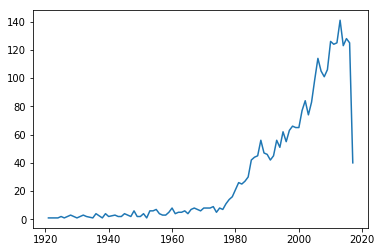

In [0]:
#get the number of movies per year
from operator import itemgetter
num_of_movies_per_year = dict(train['release_year'].value_counts())
sorted_num_of_movies_per_year = sorted(num_of_movies_per_year.items(), key=itemgetter(1))
year = [x[0] for x in sorted_num_of_movies_per_year]
num_movies = [x[1] for x in sorted_num_of_movies_per_year]
sns.lineplot(x=year, y=num_movies)

the number of movies increase by year which is as expected. 

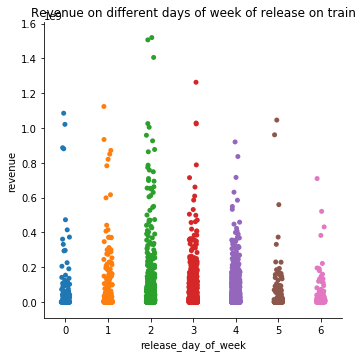

In [0]:
sns.catplot(x='release_day_of_week', y='revenue', data=train);
plt.title('Revenue on different days of week of release on train');

Text(0.5, 1.0, 'Revenue on different month of release on train')

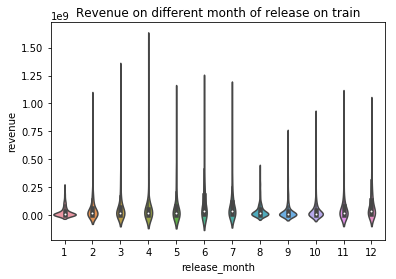

In [0]:
sns.violinplot(x='release_month', y='revenue', data=train);
plt.title('Revenue on different month of release on train')

movies released from april to june tend to have higher revenue. 

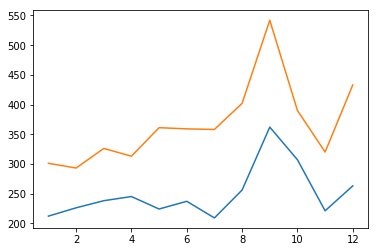

In [0]:
#movies per month 
#get the number of movies per year
num_of_movies_per_month_train = dict(train['release_month'].value_counts())
num_of_movies_per_month_test = dict(test['release_month'].value_counts())
sns.lineplot(list(num_of_movies_per_month_train.keys()),list(num_of_movies_per_month_train.values()))
sns.lineplot(list(num_of_movies_per_month_test.keys()),list(num_of_movies_per_month_test.values()))
#list(num_of_movies_per_month_train.keys())

Unable to get the legend for above plot. Any ways based on data orange line corresponds to test and blue corresponds to training. 
For both training and test more number of movies are released in  months 8-10. This doesn't quite relate to revenue since we have seen that months 4-7 have more revenues compared to other months. But months 8-10 have less skewedness on the lower revenue side . 

Runtime

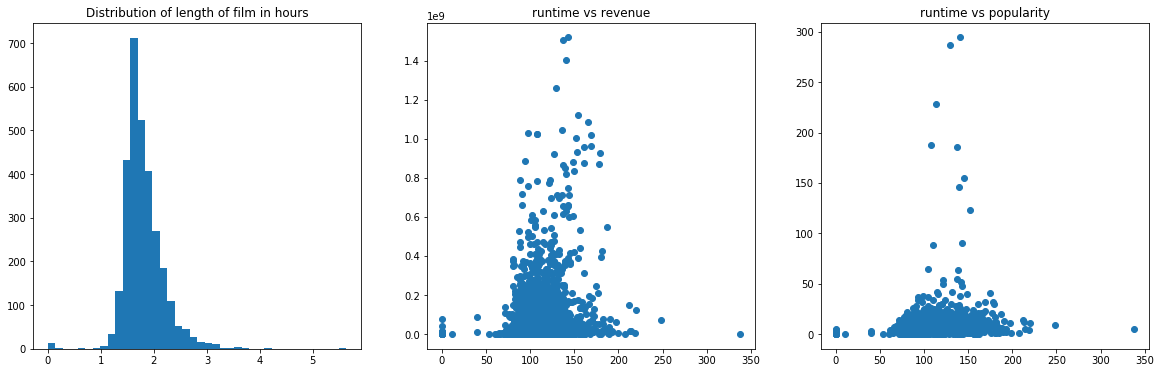

In [0]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(train['runtime'].fillna(0), train['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(train['runtime'].fillna(0), train['popularity'])
plt.title('runtime vs popularity');

Movies ranging from 1.5 to 2 hrs tend to have higher revenue.
Movies exceeding 2.5hrs have lower revenue probably due to slower pace of the movie. 

tagline

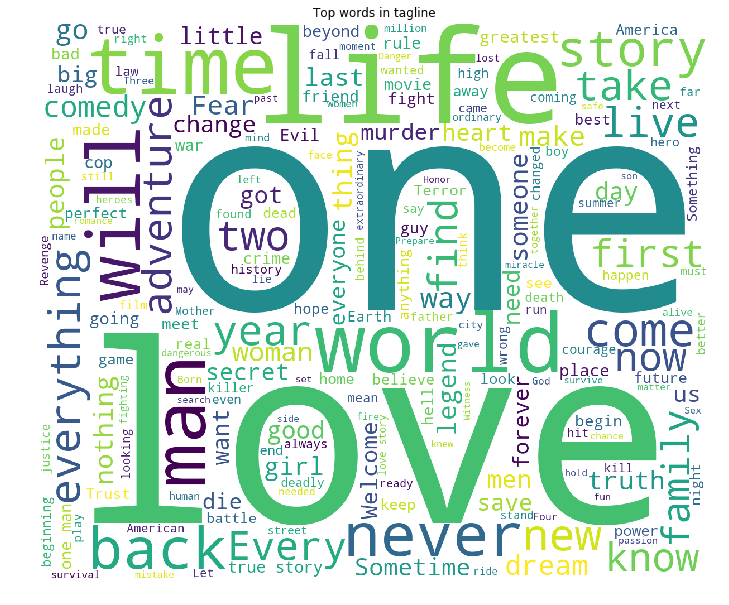

In [0]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['tagline'].fillna(' ').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

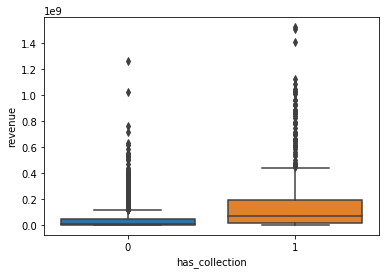

In [0]:
sns.boxplot(x='has_collection', y='revenue', data=train);

Movies fetching more revenue has collection data. 

modelling

In [0]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,crew,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_companies,production_company_i,production_company_,production_company_e,production_company_n,production_company_t,production_company_r,production_company_o,production_company_a,production_company_s,production_company_l,production_company_u,production_company_m,production_company_c,production_company_P,production_company_d,production_company_F,production_company_C,production_company_y,production_company_h,production_company_p,production_company_M,production_company_E,production_company_S,production_company_g,production_company_T,production_company_B,production_company_A,production_company_G,production_company_v,production_company_w,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_Keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,cast_name_Jason Statham,cast_name_Keith David,cast_name_John Goodman,cast_name_Mel Gibson,cast_name_Sigourney Weaver,cast_name_Frank Welker,cast_name_Michael Caine,cast_name_George Clooney,cast_name_Denzel Washington,cast_name_Robert Duvall,cast_name_Ed Harris,cast_name_Dennis Quaid,cast_name_Richard Jenkins,cast_name_Matt Damon,cast_name_Christopher Plummer,cast_name_Gene Hackman,cast_name_Christopher Walken,cast_name_William H. Macy,cast_name_James Franco,cast_name_Jim Broadbent,cast_name_John C. Reilly,cast_name_Kevin Bacon,cast_name_Christian Bale,cast_name_Alec Baldwin,cast_name_Allison Janney,cast_name_Brian Cox,cast_name_John Leguizamo,cast_name_Julianne Moore,cast_name_Robert Do

In [0]:
new_train = train.drop(['id', 'imdb_id', 'original_title', 'homepage', 'overview', 
                        'poster_path', 'status', 'tagline', ],axis = 1)
new_test = test.drop(['id', 'imdb_id', 'original_title', 'homepage', 'overview', 
                        'poster_path', 'status', 'tagline', ],axis = 1)

In [0]:
new_train = new_train.drop(['release_date', 'title', 'crew'],axis=1)
new_test  = new_test.drop(['release_date', 'title', 'crew'],axis=1)

In [0]:
for col in ['original_language', 'collection_name', 'all_genres']:
    le = LabelEncoder()
    le.fit(list(new_train[col].fillna('')) + list(new_test[col].fillna('')))
    new_train[col] = le.transform(new_train[col].fillna('').astype(str))
    new_test[col] = le.transform(new_test[col].fillna('').astype(str))

In [0]:
new_train.columns

Index(['budget', 'original_language', 'popularity', 'runtime', 'revenue',
       'collection_name', 'has_collection', 'num_genres', 'all_genres',
       'genre_Drama',
       ...
       'crew_name_Ron Howard', 'log_revenue', 'log_budget', 'has_homepage',
       'log_popularity', 'release_year', 'release_month', 'release_day',
       'release_day_of_week', 'release_week_of_month'],
      dtype='object', length=259)

In [0]:
X = new_train.drop(['revenue', 'log_revenue'], axis=1)
y = np.log1p(new_train['revenue'])
X_test = new_test

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

In [0]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.43607	valid_1's rmse: 2.34713
[2000]	training's rmse: 1.16604	valid_1's rmse: 2.3267
Early stopping, best iteration is:
[2241]	training's rmse: 1.11369	valid_1's rmse: 2.32117


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
       boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.9, importance_type='split',
       lambda_l1=0.2, learning_rate=0.01, max_depth=5, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
       min_split_gain=0.0, n_estimators=20000, n_jobs=-1, nthread=4,
       num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [0]:
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [0]:
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

In [0]:
cat_params = {'learning_rate': 0.002,
              'depth': 5,
              'l2_leaf_reg': 10,
              # 'bootstrap_type': 'Bernoulli',
              'colsample_bylevel': 0.8,
              'bagging_temperature': 0.2,
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 100,
              'random_seed': 11,
              'allow_writing_files': False}
oof_cat, prediction_cat = train_model(X, X_test, y, params=cat_params, model_type='cat')

Fold 0 started at Mon Apr 15 17:39:53 2019
Fold 1 started at Mon Apr 15 17:44:47 2019
Fold 2 started at Mon Apr 15 17:47:35 2019
Fold 3 started at Mon Apr 15 17:50:20 2019
Fold 4 started at Mon Apr 15 17:53:55 2019
CV mean score: 2.0959, std: 0.1800.


In [0]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=False)

Fold 0 started at Mon Apr 15 17:55:17 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.4547	valid_1's rmse: 1.97812
Early stopping, best iteration is:
[1139]	training's rmse: 1.4077	valid_1's rmse: 1.97698
Fold 1 started at Mon Apr 15 17:55:20 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.46204	valid_1's rmse: 1.93722
Early stopping, best iteration is:
[1175]	training's rmse: 1.39906	valid_1's rmse: 1.93225
Fold 2 started at Mon Apr 15 17:55:23 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.44431	valid_1's rmse: 1.98727
Early stopping, best iteration is:
[1686]	training's rmse: 1.234	valid_1's rmse: 1.97992
Fold 3 started at Mon Apr 15 17:55:27 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[780]	training's rmse: 1.45662	valid_1's rmse: 2.39958
Fold 4 started at Mon Apr 15 17:55:29 2019
Traini

In [0]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
oof_xgb, prediction_xgb = train_model(X, X_test, y, params=xgb_params, model_type='xgb', plot_feature_importance=False)

Fold 0 started at Mon Apr 15 17:55:31 2019


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[0]	train-rmse:15.5731	valid_data-rmse:15.7476
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.06138	valid_data-rmse:1.99576
[1000]	train-rmse:0.727048	valid_data-rmse:1.96621
[1500]	train-rmse:0.519534	valid_data-rmse:1.96024
Stopping. Best iteration:
[1438]	train-rmse:0.541237	valid_data-rmse:1.95948

Fold 1 started at Mon Apr 15 17:56:16 2019
[0]	train-rmse:15.6173	valid_data-rmse:15.5722
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[500]	train-rmse:1.05195	valid_data-rmse:1.95415
[1000]	train-rmse:0.708386	valid_data-rmse:1.92464
[1500]	train-rmse:0.49863	valid_data-rmse:1.91921
Stopping. Best iteration:
[1636]	train-rmse:0.453777	valid_data-rmse:1.91806

Fold 2 started at Mon Apr 15 17:57:07 2019
[0]	train-rmse:15.6118	valid_data-rmse:15.5947
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[500]	train-rmse:1.06	valid_data-rmse:2.07004
[1000]	train-rmse:0.724865	valid_data-rmse:2.04963
Stopping. Best iteration:
[998]	train-rmse:0.725931	valid_data-rmse:2.04917

Fold 3 started at Mon Apr 15 17:57:39 2019
[0]	train-rmse:15.6328	valid_data-rmse:15.5063
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[500]	train-rmse:0.991879	valid_data-rmse:2.39055
Stopping. Best iteration:
[495]	train-rmse:0.997554	valid_data-rmse:2.39031

Fold 4 started at Mon Apr 15 17:57:59 2019
[0]	train-rmse:15.6054	valid_data-rmse:15.6216
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[500]	train-rmse:1.01314	valid_data-rmse:2.22225
Stopping. Best iteration:
[596]	train-rmse:0.92267	valid_data-rmse:2.2193

CV mean score: 2.1073, std: 0.1753.


In [0]:
prediction_xgb

data	     sample_data	    test.csv	  train.csv
kaggle.json  sample_submission.csv  test.csv.zip  train.csv.zip
